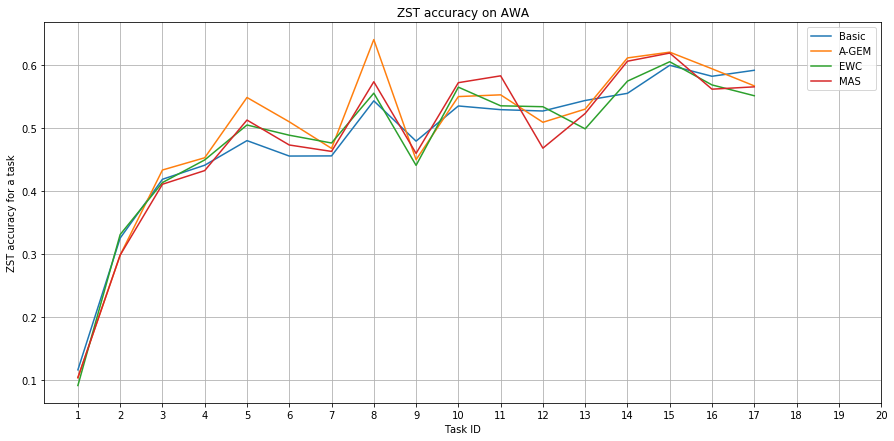

In [450]:
import numpy as np
import matplotlib.pyplot as plt

exps_dir = '../experiments'
exps = {
    'agem': [f'agem_cub-{i:05d}' for i in range(26, 28)],
    'basic': [f'basic_cub-{i:05d}' for i in range(25, 35)],
    'ewc': [f'ewc_cub-{i:05d}' for i in range(25, 29)],
    'mas': [f'mas_cub-{i:05d}' for i in range(25, 27)]
}
# exps = {
#     'agem': [f'agem_awa-{i:05d}' for i in range(2, 10)],
#     'basic': [f'basic_awa-{i:05d}' for i in range(1, 11)],
#     'ewc': [f'ewc_awa-{i:05d}' for i in range(1, 11)],
#     'mas': [f'mas_awa-{i:05d}' for i in range(1, 11)]
# }

accs_histories = {exp: np.array([np.load(f'{exps_dir}/{p}/custom_data/accs_history.npy') for p in exps[exp]]) for exp in exps}
zst_accs = {exp: np.array([np.load(f'{exps_dir}/{p}/custom_data/zst_accs.npy') for p in exps[exp]]) for exp in exps}
lca_scores = {exp: np.array([np.load(f'{exps_dir}/{p}/custom_data/test_acc_batch_histories.npy') for p in exps[exp]]) for exp in exps}
ausuc_scores = {exp: np.array([np.load(f'{exps_dir}/{p}/custom_data/ausuc_scores.npy') for p in exps[exp]]) for exp in exps}
ausuc_accs = {exp: np.array([np.load(f'{exps_dir}/{p}/custom_data/ausuc_accs.npy', allow_pickle=True) for p in exps[exp]]) for exp in exps}

plt.figure(figsize=(15, 7))
# plt.title('ZST accuracy on CUB')
plt.title('ZST accuracy on AWA')

# # plt.plot(np.arange(1, 21), agem_scores.mean(axis=0), color='red', marker='^', label='A-GEM old (5 runs)')
# # plt.fill_between(np.arange(1, 21),
# #          agem_scores.mean(axis=0) + agem_scores.std(axis=0),
# #          agem_scores.mean(axis=0) - agem_scores.std(axis=0),
# #          color='red', alpha=0.05)

# # plt.plot(np.arange(1, 21), basic_scores.mean(axis=0), color='blue', label='Baseline (averaged across 5 runs)')
# # plt.fill_between(np.arange(1, 21),
# #          basic_scores.mean(axis=0) + basic_scores.std(axis=0),
# #          basic_scores.mean(axis=0) - basic_scores.std(axis=0),
# #          color='blue', alpha=0.05)

# task_indices = np.arange(1, 11)
task_indices = np.arange(1, 18)
plt.plot(task_indices, zst_accs['basic'].mean(axis=0), label='Basic')
plt.plot(task_indices, zst_accs['agem'].mean(axis=0), label='A-GEM')
plt.plot(task_indices, zst_accs['ewc'].mean(axis=0), label='EWC')
plt.plot(task_indices, zst_accs['mas'].mean(axis=0), label='MAS')

plt.xlabel('Task ID')
plt.ylabel('ZST accuracy for a task')
plt.xticks(np.arange(1, 21))
plt.legend()
plt.grid()

In [451]:
import sys; sys.path.append('..')
from src.utils.metrics import compute_average_accuracy, compute_forgetting_measure, compute_learning_curve_area

for key in ['basic', 'ewc', 'mas', 'agem']:
    print(f'Average [LCA10] score for {key}: {np.mean([compute_learning_curve_area(ss) for ss in lca_scores[key]]):.5f}')

Average [LCA10] score for basic: 0.57532
Average [LCA10] score for ewc: 0.57844
Average [LCA10] score for mas: 0.58010
Average [LCA10] score for agem: 0.58963


In [452]:
for key in ['basic', 'ewc', 'mas', 'agem']:
    print(f'Average [Average Accuracy] score for {key}: {100 * np.mean([compute_average_accuracy(ss) for ss in accs_histories[key]]):.3f}')

Average [Average Accuracy] score for basic: 70.596
Average [Average Accuracy] score for ewc: 71.557
Average [Average Accuracy] score for mas: 71.553
Average [Average Accuracy] score for agem: 74.873


In [453]:
for key in ['basic', 'ewc', 'mas', 'agem']:
    print(f'Average [Forgetting Measure] score for {key}: {np.mean([compute_forgetting_measure(ss) for ss in accs_histories[key]]):.5f}')

Average [Forgetting Measure] score for basic: 0.09495
Average [Forgetting Measure] score for ewc: 0.08324
Average [Forgetting Measure] score for mas: 0.07731
Average [Forgetting Measure] score for agem: 0.05056


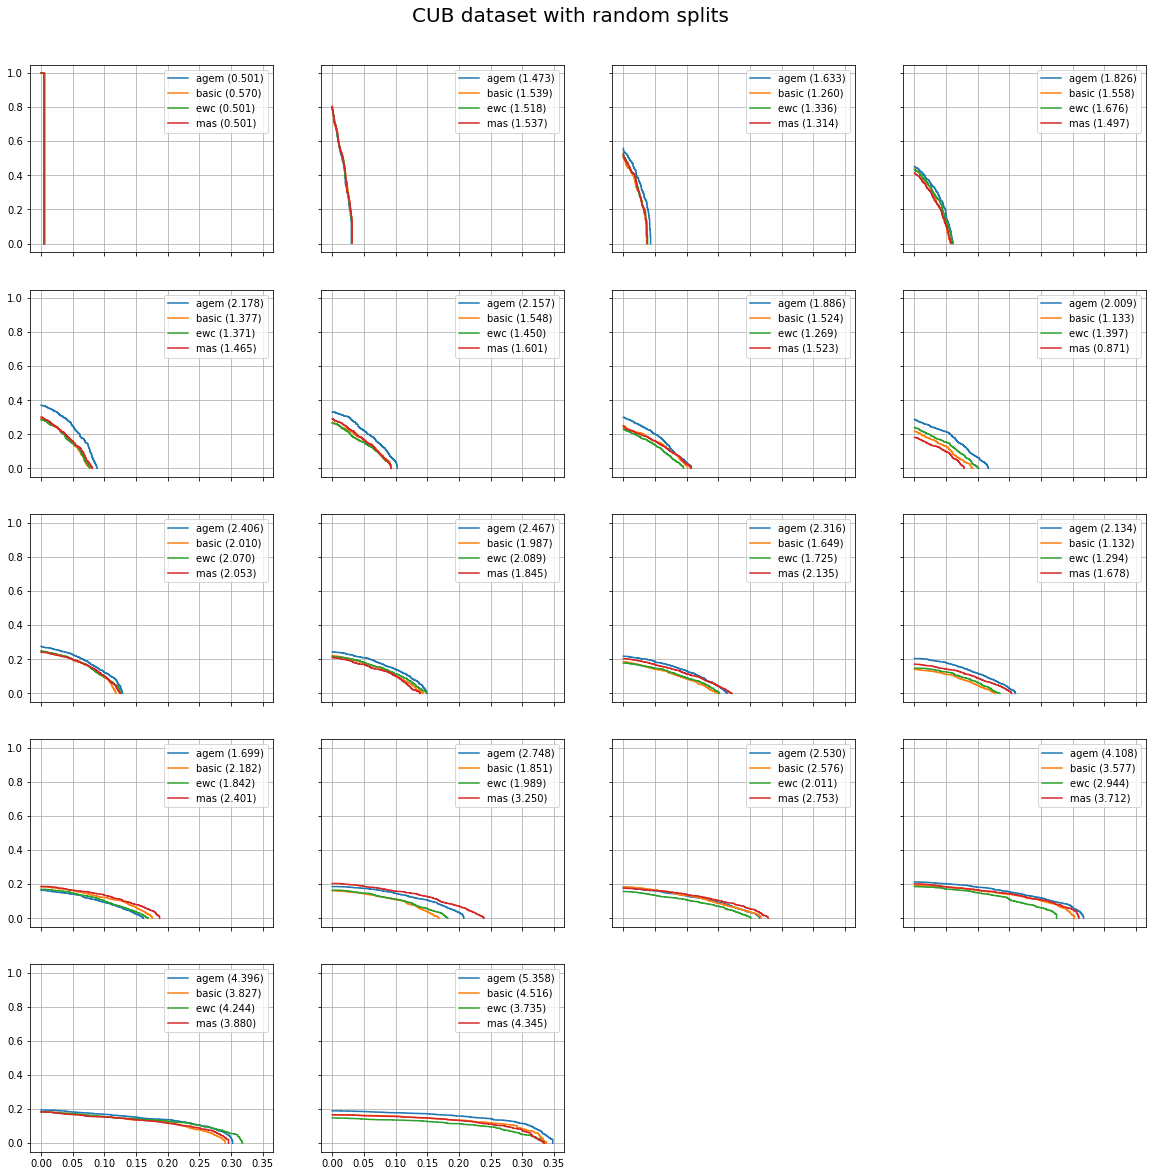

In [448]:
nrows, ncols = 5, 4
fig, subplots = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(20, 20))
fig.suptitle('CUB dataset with random splits', y=0.92, fontsize=20)
subplots = [s for subplots_row in subplots for s in subplots_row]
methods = ['agem', 'basic', 'ewc', 'mas']

for i in range(len(ausuc_accs['basic'][0])):
    #subplot = subplots[i // nrows][i % ncols]
    for method in methods:
        #s_accs = np.mean([run[i][0] for run in ausuc_accs[method]], axis=0)
        #u_accs = np.mean([run[i][1] for run in ausuc_accs[method]], axis=0)
        s_accs = [run[i][0] for run in ausuc_accs[method]][0]
        u_accs = [run[i][1] for run in ausuc_accs[method]][0]
        
        subplots[i].plot(u_accs, s_accs, label=f'{method} ({100 * np.trapz(y=s_accs, x=u_accs):.03f})')
        
    subplots[i].grid()
    subplots[i].legend()
    
for subplot in subplots[len(ausuc_accs['basic'][0]):]:
    subplot.set_axis_off()

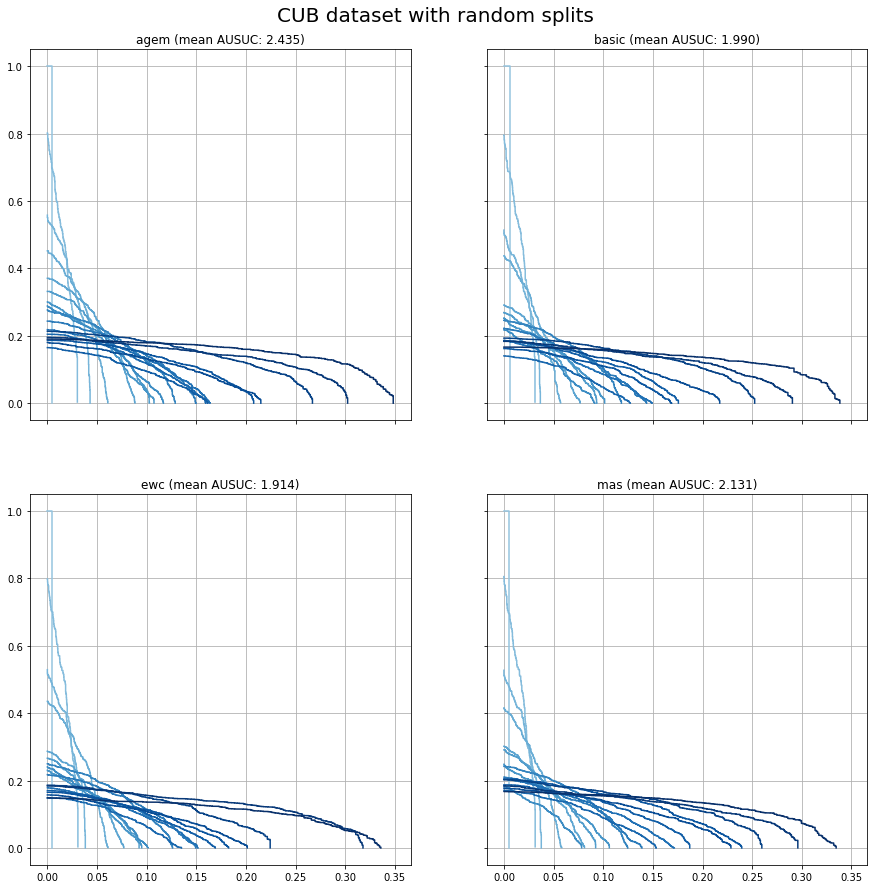

In [449]:
nrows, ncols = 2, 2
fig, subplots = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(15, 15))
fig.suptitle('CUB dataset with random splits', y=0.92, fontsize=20)
subplots = [s for subplots_row in subplots for s in subplots_row]
methods = ['agem', 'basic', 'ewc', 'mas']

for i, method in enumerate(methods):
    accs = ausuc_accs[method][0]
    colors = plt.cm.Blues(np.linspace(0.4 ,1,len(accs)))
    
    for color, (s_accs, u_accs) in zip(colors, accs): 
        subplots[i].plot(u_accs, s_accs, color=color)
        
    ausucs = 100 * np.array([np.trapz(y=s, x=u) for s, u in accs])
    
    subplots[i].set_title(f'{method} (mean AUSUC: {np.mean(ausucs):.03f})')
    subplots[i].grid()
    #subplots[i].legend()